# Exercises 6: Maximum Likelihood / Regularization #

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

## 1. Pseudoinverse ##

(c) Compute the pseudoinverse of the 4 × 6 matrix A=np.array([[1,2,-2,4,0,-1],[0,0,2,-1,2,1],[9,0,-1,0,1,1],[2,1,-2,0,2,0]]).
Analyse the spectrum (eigenvalues) of the matrix $(A^TA)^{−1}$. What’s the problem?

In [2]:
def pinv(A):
    A_pinv = np.linalg.inv(A.T @ A) @ A.T
    return A_pinv

In [3]:
# Compute the pseudoinverse of the 4 × 6 matrix
A = np.array([[1,2,-2,4,0,-1],
              [0,0,2,-1,2,1],
              [9,0,-1,0,1,1],
              [2,1,-2,0,2,0]])

A_pinv = pinv(A)
print('Pseudoinverse:\n', A_pinv)

Pseudoinverse:
 [[ 0.21679688  0.125       0.125      -0.125     ]
 [ 3.25       -1.5        -0.46875     1.        ]
 [ 0.9140625   0.5         0.25       -0.25      ]
 [ 0.0625      0.25        0.         -0.375     ]
 [ 0.375       1.          0.375       0.        ]
 [-0.5        -2.         -1.          1.        ]]


In [4]:
# Analyse the spectrum
v, w = np.linalg.eig(A.T @ A)

print('Matrix:\n', np.linalg.inv(A.T @ A))
print('Eigenvalues:', v)

Matrix:
 [[ 1.71709090e+13 -7.62577780e+14  1.07863778e+13  2.52725311e+14
   3.74904359e+14 -5.18656162e+14]
 [ 3.21065158e+14  5.49353143e+15  9.07127544e+14 -2.32890712e+15
  -2.16070333e+15  1.78244450e+14]
 [ 4.94879113e+13 -1.49236753e+15  5.62815345e+13  4.76430792e+14
   7.52977390e+14 -1.14208706e+15]
 [-1.34290024e+14 -1.09045805e+15 -3.36301412e+14  5.42923616e+14
   3.43217636e+14  5.29091167e+14]
 [-1.28215577e+14 -3.47655547e+15 -4.08068616e+14  1.38815904e+15
   1.45842470e+15 -7.12553120e+14]
 [ 2.31653072e+13  8.84738796e+15  3.67272750e+14 -3.18625605e+15
  -4.07958654e+15  4.23837152e+15]]
Eigenvalues: [ 9.23792054e+01+0.0000000e+00j  2.92454716e+01+0.0000000e+00j
  7.56992142e+00+0.0000000e+00j  3.80540151e+00+0.0000000e+00j
 -1.22387532e-15+2.2563426e-16j -1.22387532e-15-2.2563426e-16j]


Problem: Two of the eigenvalues are almost 0 and therefore the matrix is not invertible.

(d) Generate a 6 × 100 normally distributed random matrix $x$ (100 input vectors) and derive the
observables $y = A x$. Compute the risk for $A^* = (A^T A)^{−1} A^T$ and the approximate unity $A A^*$.
What’s the problem?

In [5]:
# Generate a 6 × 100 normally distributed random matrix 𝑥
x = np.random.normal(size=(6,100))

# Derive the observables y = Ax
y = A @ x

In [6]:
def risk(A, A_pinv, y):
    R = np.sum(np.abs(A @ A_pinv @ y - y) ** 2)
    return R

def approximate_unity(A, A_pinv):
    A_unity = A @ A_pinv
    return A_unity

In [7]:
# Compute the risk
R = risk(A, A_pinv, y)
print('Risk:\n', R)

# Approximate unity A A*
A_unity = approximate_unity(A, A_pinv)
print('Approximate unity:\n', A_unity)

Risk:
 82161.27052320671
Approximate unity:
 [[ 5.63867188 -0.875      -0.3125     -0.125     ]
 [ 2.015625    0.75        0.25        0.875     ]
 [ 0.91210938 -0.375       0.25        0.125     ]
 [ 2.60546875 -0.25        0.03125     1.25      ]]


Problems:
- The risk is very large (see 1.(b)).
- The approximate unity is far away from a unity matrix.

(e) Introduce the regularization parameter $\delta > 0$ to define

$$ A^*_\delta = (A^T A + \delta E)^{−1} A^T $$

with $E$ denoting the unity matrix and compute the risk and $A A^*$ as a function of $\delta$. Interpret
the result!

In [8]:
def MP_pinv(A, delta):
    A_MP_pinv = np.linalg.inv(A.T @ A + delta * np.eye(*(A.T @ A).shape)) @ A.T
    return A_MP_pinv



____________________ delta = 1 ____________________

Risk:
 38.24794507342027

Approximate unity:
 [[ 9.33350529e-01 -5.43203508e-02 -2.32138251e-03  4.17332989e-02]
 [-5.43203508e-02  8.64654802e-01 -8.59771301e-05  3.11753074e-02]
 [-2.32138251e-03 -8.59771301e-05  9.80053306e-01  3.26713094e-02]
 [ 4.17332989e-02  3.11753074e-02  3.26713094e-02  8.53383200e-01]]

Approximate unity close to unity:
 [[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]]


____________________ delta = 0.1 ____________________

Risk:
 0.528140617630552

Approximate unity:
 [[ 9.92341365e-01 -6.78352906e-03 -4.14068624e-04  5.37241124e-03]
 [-6.78352906e-03  9.84069760e-01 -1.56339814e-04  4.40516858e-03]
 [-4.14068624e-04 -1.56339814e-04  9.97852415e-01  3.85949847e-03]
 [ 5.37241124e-03  4.40516858e-03  3.85949847e-03  9.82603950e-01]]

Approximate unity close to unity:
 [[False False False False]
 [False False False False]
 [False False False Fal

Text(0.5, 1.0, 'risk (R) as function of $\\delta$')

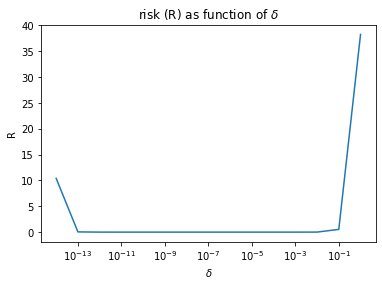

In [9]:
delta = [1, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]
R_all = np.zeros(len(delta))

for i in range(len(delta)):
    print('\n\n____________________ delta = {} ____________________\n'.format(delta[i]))
    A_MP_pinv = MP_pinv(A, delta[i])
    
    R = risk(A, A_MP_pinv, y)
    R_all[i] = R
    print('Risk:\n', R)
    
    A_unity = approximate_unity(A, A_MP_pinv)
    print('\nApproximate unity:\n', A_unity)
    
    print('\nApproximate unity close to unity:\n', np.isclose(A_unity, np.eye(*A_unity.shape)))

fig, ax = plt.subplots()
plt.plot(delta, R_all)
plt.xlabel('$\delta$')
ax.set_xscale('log')
plt.ylabel('R')
plt.title('risk (R) as function of $\delta$')

## 2. General linear model ##

(a) Load the two data sets olsx.txt and olsy.txt as example data points and regressors and fit a
general linear model using statsmodels.regression.linear model.OLS.

In [10]:
# Load data sets
X = np.loadtxt('olsx.txt').T
print('X has 4 variables with 50 observations each:', X.shape)

y = np.loadtxt('olsy.txt')
print('y has 50 observations:', y.shape)

X has 4 variables with 50 observations each: (50, 4)
y has 50 observations: (50,)


In [11]:
# Fit GLM
X_df = pd.DataFrame(X, columns = ['x1','x2','x3','x4'])

X_df = sm.add_constant(X_df)
model = sm.OLS(y, X_df)
results = model.fit()

(b) Interpret the output of the summary method in OLS.fit().

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     47.71
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.25e-15
Time:                        10:05:53   Log-Likelihood:                 16.192
No. Observations:                  50   AIC:                            -22.38
Df Residuals:                      45   BIC:                            -12.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4625      0.089      5.179      0.000       0.283       0.642
x1            -0.8651      0.093     -9.331      0.000      -1.052      -0.678
x2            -0.8513      0.105     -8.146      0.000      -1.062      -0.641
x3             0.1025      0.098      1.045      0.302      -0.095       0.300
x4             0.0754      0.094      0.798      0.429      -0.115       0.265
==============================================================================
Omnibus:                        5.547   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.150
Skew:                          -0.786   Prob(JB):                       0.0762
Kurtosis:                       2.984   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall, the model explains the data well (F-test significant). The regressors that contribute significantly are $x_1$, $x_2$ (and the constant term).

(c) As a next step, explore whether there are interactions between input dimensions, by including all
second order monomials $x_n$ $x_m$ as regressors.

In [13]:
X_df_interaction = X_df
for i in range(1, 5):
    for j in range(i+1, 5):
        monomial = X_df.iloc[:, i] * X_df.iloc[:, j]
        X_df_interaction['x{}x{}'.format(i,j)] = monomial

X_df_interaction[:5]

,const,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4
0,1.0,0.582336,0.950377,0.821141,0.604603,0.553439,0.478180,0.352082,0.780394,0.574601,0.496464
1,1.0,0.640391,0.484801,0.753801,0.725836,0.310462,0.482727,0.464819,0.365444,0.351886,0.547136
2,1.0,0.148305,0.401996,0.943205,0.508114,0.059618,0.139882,0.075356,0.379165,0.204260,0.479255
3,1.0,0.140078,0.300134,0.365216,0.065764,0.042042,0.051159,0.009212,0.109614,0.019738,0.024018
4,1.0,0.783154,0.607927,0.708967,0.878425,0.476100,0.555230,0.687942,0.431000,0.534018,0.622775


In [14]:
model_interaction = sm.OLS(y, X_df_interaction)
results_interaction = model_interaction.fit()
results_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     165.1
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.07e-28
Time:                        10:05:53   Log-Likelihood:                 69.004
No. Observations:                  50   AIC:                            -116.0
Df Residuals:                      39   BIC:                            -94.98
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0966      0.076      1.276      0.210      -0.057       0.250
x1             0.0778      0.107      0.729      0.470      -0.138       0.294
x2             0.1834      0.151      1.212      0.233      -0.123       0.490
x3            -0.0233      0.132     -0.176      0.861      -0.291       0.244
x4             0.0037      0.106      0.035      0.972      -0.212       0.219
x1x2          -2.2865      0.149    -15.323      0.000      -2.588      -1.985
x1x3           0.1721      0.127      1.356      0.183      -0.085       0.429
x1x4          -0.0412      0.123     -0.335      0.739      -0.290       0.208
x2x3           0.0523      0.167      0.313      0.756      -0.286       0.390
x2x4           0.0241      0.182      0.133      0.895      -0.343       0.391
x3x4           0.0754      0.131      0.574      0.569      -0.191       0.341
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.542
Skew:                          -0.297   Prob(JB):                        0.463
Kurtosis:                       2.378   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The only significant regressor is now the interaction term $x_1$ $x_2$ while the single regressors that showed significant contributions before are not significant anymore. The meaning can be interpreted as follows: The influence of $x_1$ on $y$ is different for each value of $x_2$.

__Comment:__ (1) AIC and BIC are much smaller with the interaction terms than without. Therefore, the model has a better fit although it contains more parameters. (2) Additionally, $x^2_1$ etc. can be included.

## 4. Gaussian Mixture Model ##

(a) Load the data sets d100.txt and d1000.txt containing 1000 and 1000 realizations of a 2-d
random process, respectively and employ sklearn.mixture.GaussianMixture to fit the model
assuming M = 2, .., 5 components.

In [15]:
# Load data sets
d100 = np.loadtxt('d100.txt')
print('d100 has 2 variables with 100 observations each:', d100.shape)

d1000 = np.loadtxt('d1000.txt')
print('d1000 has 2 variables with 1000 observations each:', d1000.shape)

d100 has 2 variables with 100 observations each: (100, 2)
d1000 has 2 variables with 1000 observations each: (1000, 2)


In [16]:
def plot_gaussian(ax, mean, cov, color='red', size=3):
    # draws ellipses representing different standard deviations (size is the number of ellipses)
    # width and height are times by 2 since sqrt of the eigenval only measures half the distance
    eig_w, eig_v = np.linalg.eig(cov)    
    for i in range(size):
        ell = Ellipse(xy=[mean[0], mean[1]], 
                      width=np.sqrt(eig_w[0]) * 2 * (i + 1), 
                      height=np.sqrt(eig_w[1]) * 2 * (i + 1), 
                      angle=np.rad2deg(np.arccos(eig_v[0, 0])), 
                      edgecolor=color, lw=2, facecolor='none')
        ax.add_artist(ell)

In [17]:
def run_and_plot_GM(data, k=2): 

    gmm = GaussianMixture(n_components=k)
    gmm.fit(data)
    labels = gmm.predict(data)
    weights = gmm.weights_
    means = gmm.means_
    covariances = gmm.covariances_
    AIC = gmm.aic(data)
    BIC = gmm.bic(data)
    
    print('\nk = {}'.format(k))
    print('AIC', AIC)
    print('BIC:', BIC)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid()
    
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    for i, color in enumerate(colors):
        cluster = data[labels==i]
        ax.scatter(cluster[:, 0], cluster[:, 1], color=color, label="Points cluster {}".format(i))
        plot_gaussian(ax, means[i], covariances[i], color=color, size=2)
        ax.scatter(means[i, 0], means[i, 1], color=color, marker="x", s=200, lw=4, label="Mean cluster {}".format(i))
        
    ax.legend()


k = 2
AIC 838.2353124335314
BIC: 866.8921844794004

k = 3
AIC 809.1387493028612
BIC: 853.4266424646588

k = 4
AIC 809.581659433268
BIC: 869.5005737109941

k = 5
AIC 806.2181389065039
BIC: 881.7680743001586


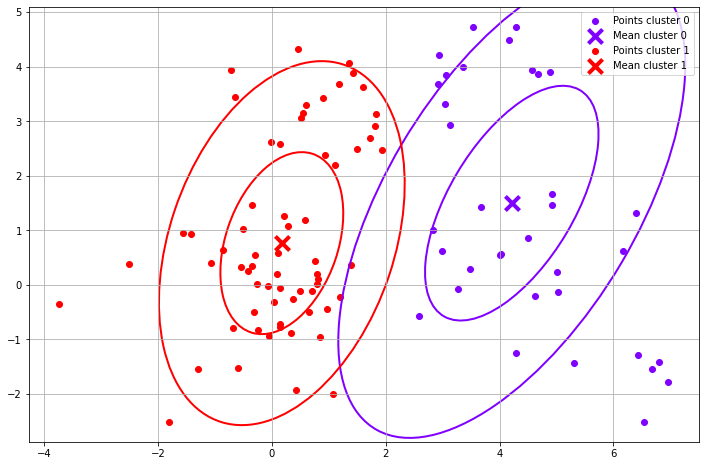

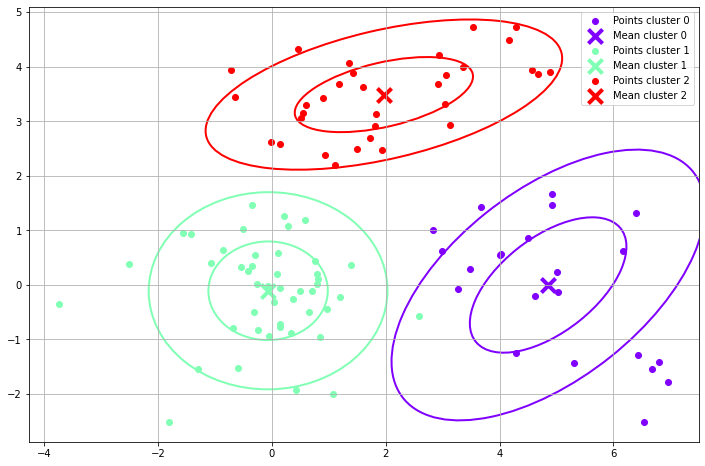

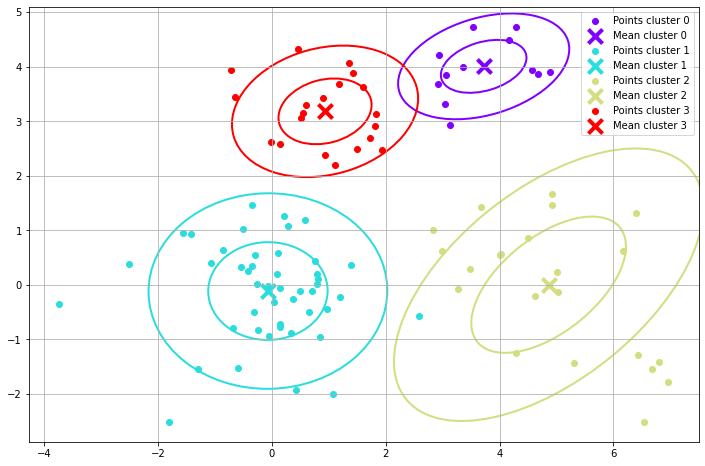

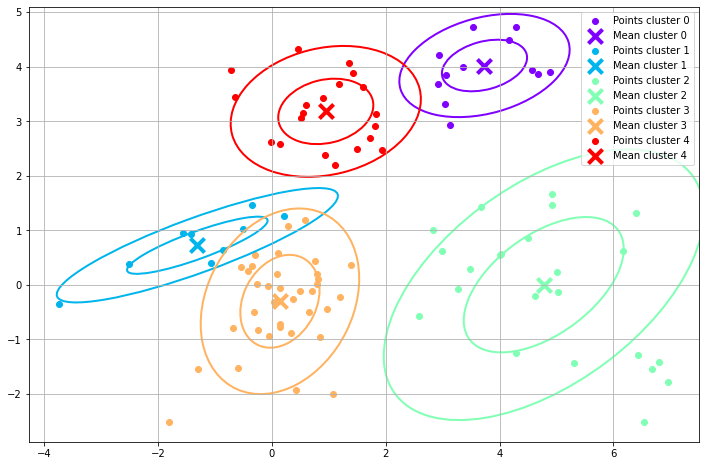

In [18]:
# fit d100
k = [2, 3, 4, 5]

for i in range(len(k)):
    run_and_plot_GM(d100, k=k[i])


k = 2
AIC 7878.906948259071
BIC: 7932.892256327875

k = 3
AIC 7711.785900957764
BIC: 7795.21774070046

k = 4
AIC 7567.914335260606
BIC: 7680.792706677195

k = 5
AIC 7579.200675066166
BIC: 7721.5255781566475


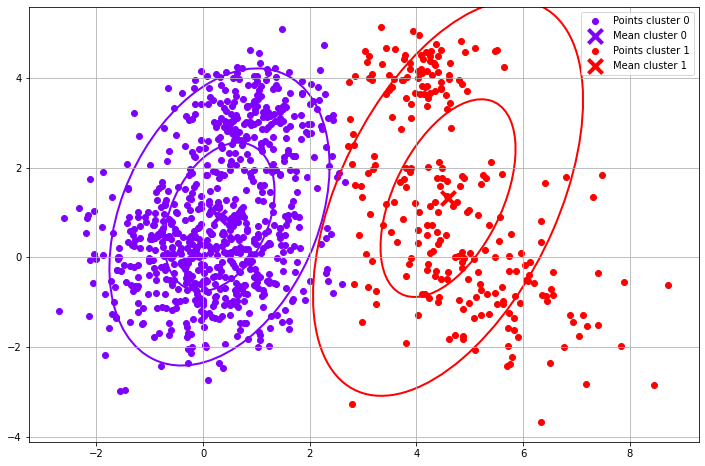

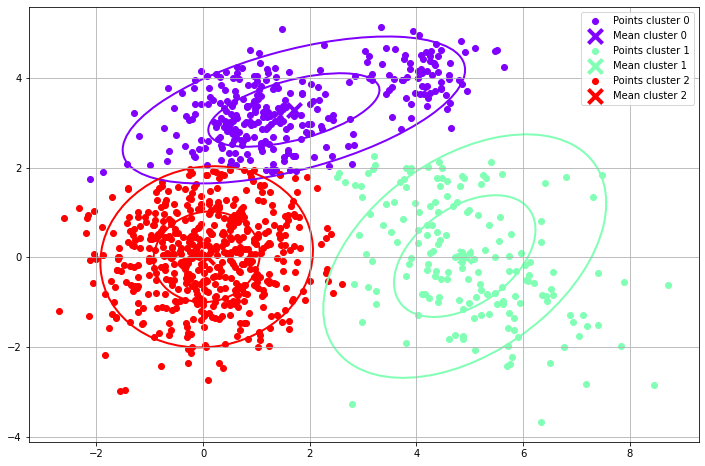

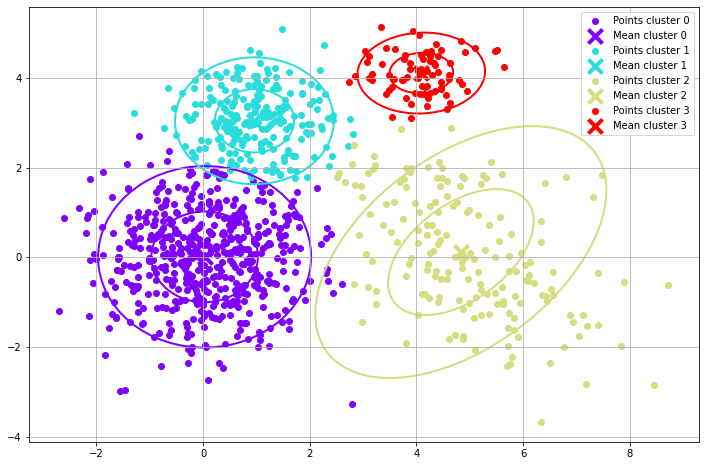

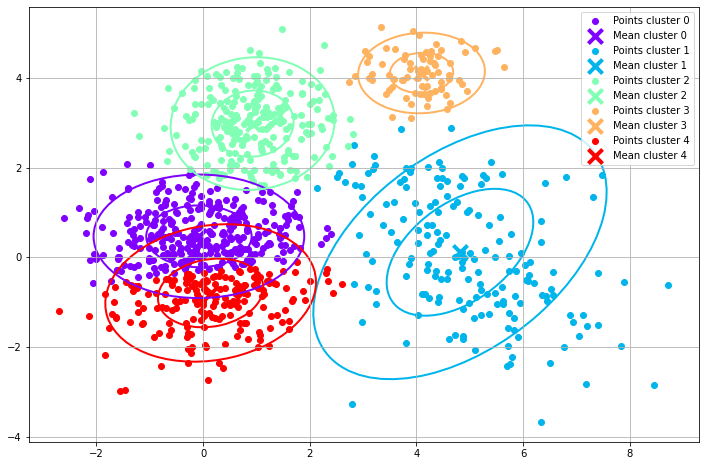

In [20]:
# fit d1000
k = [2, 3, 4, 5]

for i in range(len(k)):
    run_and_plot_GM(d1000, k=k[i])

With increasing numbers of components, the BIC does not necessarily decrease which means the fit as encoded by the BIC is not improving (BIC is approximately equal to the negative log-likelihood and therefore smalll values mean a better fit). The BIC also scales (monotonically) with increasing N.

__Comment:__ Makes sense to run GMM algorithm multiple times and then check BIC because it is probabilistic and can lead to different solutions depending on the initialization.